# This notebook contains the complete coding for the capstone project

In [6]:
# same libraries as in examples
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [5]:
# load foursquare data
url = "https://api.foursquare.com/v2/venues/search?ll=52.297477,8.905634&radius=100000&query=Computer&client_id=JYMVANYY1LM14EQ4LRTK5BLK4Y0R0BSRLC0R5MCGH00ZLX1X&client_secret=ECPI5W2LCZTNL0CP2TZHLUSTXFVDQDVJ3I0B4IBW3VCBMR04&v=20200101"

results = requests.get(url).json()

# sanity check: print names
for venue in results['response']['venues']:
    print(venue["name"])

Computer Service Dröge
TM Computer e.K. - Thomas Müller (Büro)
TM Computer e.K.
Schormann-Computer
4you-computer.de
Computer-Service-Biehler
HSE Computersysteme
Computer Extertal
Computertechnik Lübbecke
Entrance Computer MICROTREND
Computercentrum Bünde
Computercentrum Lübbecke
Thomas Moosmayer Computer-Systeme
Computer Technik Barsinghausen
Computer Corner
Computer & Smartphone Center
HSBV Computer
Reformat Computer
bpm-computer
2nd Computer
Sicom Computer & Communication e.K.
Ai-Lo Computer & Service
Marktkauf Wunstorf
Apple & Windows Computer-Shop
Computer Electronics
pco Personal Computer Organisation
Hoffmann Computer
MF Computer Service
SCHELL Computer- & Handyservice
Indivi Co Computer &Hardware Shop


In [6]:
# create pandas dataframe from data
foursquare_filtered = []

for venue in results['response']['venues']:
    foursquare_filtered.append([venue["name"], venue["location"]["lat"], venue["location"]["lng"], "Foursquare"])

df_foursquare = pd.DataFrame(np.array(foursquare_filtered),
                   columns=['Name', 'Latitude', 'Longitude', "Source"])

df_foursquare.head()

,Name,Latitude,Longitude,Source
0,Computer Service Dröge,52.279037,8.902915,Foursquare
1,TM Computer e.K. - Thomas Müller (Büro),52.15775752422116,8.63429950693619,Foursquare
2,TM Computer e.K.,52.116941302856596,8.67265034442815,Foursquare
3,Schormann-Computer,52.18319156583845,8.874798774686496,Foursquare
4,4you-computer.de,52.24314880371094,8.840249061584473,Foursquare


In [7]:
# visualize entries in map
import folium
minden_lat = 52.297477
minden_lon = 8.905634

minden_map = folium.Map(location=[minden_lat, minden_lon], zoom_start=8)

for lat, lon, name in zip(df_foursquare['Latitude'], df_foursquare['Longitude'], df_foursquare['Name']):
    label = folium.Popup(str(name), parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lon)],
        radius=5,
        popup=label,
        fill=True,
        fill_opacity=0.7).add_to(minden_map)

minden_map

In [8]:
# load eBay data
df_ebay = pd.read_csv('ebay_2020_12_05.csv')
df_ebay.head()

,itemId,title,globalId,primaryCategory/categoryId,primaryCategory/categoryName,galleryURL,viewItemURL,paymentMethod/0,autoPay,postalCode,location,country,shippingInfo/shippingServiceCost/_,shippingInfo/shippingServiceCost/$/currencyId,shippingInfo/shippingType,shippingInfo/shipToLocations,sellingStatus/currentPrice/_,sellingStatus/currentPrice/$/currencyId,sellingStatus/convertedCurrentPrice/_,sellingStatus/convertedCurrentPrice/$/currencyId,sellingStatus/bidCount,sellingStatus/sellingState,sellingStatus/timeLeft,listingInfo/bestOfferEnabled,listingInfo/buyItNowAvailable,listingInfo/startTime,listingInfo/endTime,listingInfo/listingType,listingInfo/gift,listingInfo/watchCount,distance/_,distance/$/unit,condition/conditionId,condition/conditionDisplayName,isMultiVariationListing,topRatedListing,eBayPlusEnabled,paymentMethod/1,paymentMethod/2,paymentMethod/3,galleryPlusPictureURL,listingInfo/buyItNowPrice/_,listingInfo/buyItNowPrice/$/currencyId,listingInfo/convertedBuyItNowPrice/_,listingInfo/convertedBuyItNowPrice/$/currencyId,productId/_,productId/$/type,paymentMethod/4,subtitle
0,233800267763,ACER Nitro 5 (AN515-52-76YJ) schwarz Gaming-No...,EBAY-DE,177,PC Notebooks & Netbooks,https://thumbs4.ebaystatic.com/m/mGjbKrN1YS5AM...,https://www.ebay.de/itm/ACER-Nitro-5-AN515-52-...,PayPal,False,309**,"Ronnenberg,Deutschland",DE,8.49,EUR,Flat,Worldwide,551.00,EUR,551.00,EUR,59.0,Active,P0DT0H25M19S,False,False,2020-11-28T14:51:13.000Z,2020-12-05T14:51:13.000Z,Auction,False,40.0,60.0,km,3000,Gebraucht,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,184560017711,"MacBook Pro (Retina 15 Zoll, Anfang 2013), 8 G...",EBAY-DE,111422,Apple Notebooks,https://thumbs4.ebaystatic.com/m/msQghnuTeuZlm...,https://www.ebay.de/itm/MacBook-Pro-Retina-15-...,CIPInCheckoutEnabled,False,595**,"Warstein,Deutschland",DE,6.49,EUR,Flat,Worldwide,302.00,EUR,302.00,EUR,4.0,Active,P0DT0H55M12S,False,False,2020-11-30T15:21:06.000Z,2020-12-05T15:21:06.000Z,Auction,False,33.0,100.0,km,3000,Gebraucht,False,False,False,PayPal,MoneyXferAccepted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,154228405289,"MacBook Pro 13"" 2016 Touch Bar, generalüberholt",EBAY-DE,111422,Apple Notebooks,https://thumbs2.ebaystatic.com/m/mcAnWzSkfH33c...,https://www.ebay.de/itm/MacBook-Pro-13-2016-To...,CIPInCheckoutEnabled,False,305**,"Hannover,Deutschland",DE,5.99,EUR,Flat,Worldwide,920.00,EUR,920.00,EUR,NaN,Active,P30DT23H55M9S,True,False,2020-12-05T14:21:03.000Z,2021-01-05T14:21:03.000Z,FixedPrice,False,NaN,70.0,km,2000,Vom Hersteller generalüberholt,False,False,False,CashOnPickup,PayPal,MoneyXferAccepted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,133590834366,"HP Pavillion Notebook, 17"", 16GB, AMD A8-6410 ...",EBAY-DE,177,PC Notebooks & Netbooks,https://thumbs3.ebaystatic.com/m/mYOU7Bg7hJ29h...,https://www.ebay.de/itm/HP-Pavillion-Notebook-...,PayPal,False,331**,"Paderborn,Deutschland",DE,5.99,EUR,Flat,Worldwide,269.89,EUR,269.89,EUR,53.0,Active,P0DT0H57M0S,False,False,2020-11-28T15:22:54.000Z,2020-12-05T15:22:54.000Z,Auction,False,57.0,70.0,km,2500,Vom Verkäufer generalüberholt,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,383843713150,"Laptop Acer Extensa 5635*15,6 Zoll*Intel Core ...",EBAY-DE,177,PC Notebooks & Netbooks,https://thumbs3.ebaystatic.com/m/m17lV-3vKDLAe...,https://www.ebay.de/itm/Laptop-Acer-Extensa-56...,NaN,False,316**,"Bückeburg,Deutschland",DE,7.50,EUR,Flat,Worldwide,89.95,EUR,89.95,EUR,NaN,Active,P30DT22H10M19S,True,False,2020-12-05T12:36:13.000Z,2021-01-05T12:36:13.000Z,FixedPrice,False,2.0,20.0,km,3000,Gebraucht,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# add columns to both datasets to receive following structure:
# name (store or item), lat, long, city, state

# first: get rid of country in location
df_ebay["location"] = df_ebay["location"].apply(lambda x: x.split(",Deutschland")[0])
df_ebay["Name"] = df_ebay["title"]
df_ebay["City"] = df_ebay["location"]
df_ebay["location"].head()

0    Ronnenberg
1      Warstein
2      Hannover
3     Paderborn
4     Bückeburg
Name: location, dtype: object

In [10]:
# second: copy eBay to new dataframe
df_ebay_corrected = df_ebay[['Name', 'City']].copy()
df_ebay_corrected.head()

,Name,City
0,ACER Nitro 5 (AN515-52-76YJ) schwarz Gaming-No...,Ronnenberg
1,"MacBook Pro (Retina 15 Zoll, Anfang 2013), 8 G...",Warstein
2,"MacBook Pro 13"" 2016 Touch Bar, generalüberholt",Hannover
3,"HP Pavillion Notebook, 17"", 16GB, AMD A8-6410 ...",Paderborn
4,"Laptop Acer Extensa 5635*15,6 Zoll*Intel Core ...",Bückeburg


In [56]:
# third: add state, lat and lng to ebay df by using geocoder
#!pip install geocoder
import geocoder
g = geocoder.osm('52.078748	9.1089216')
print(g.json["lat"])
print(g.json["state"])
print(g.json["lng"])
print(g.json)

52.0787339
Nordrhein-Westfalen
9.108883055254255
{'accuracy': 0.001, 'address': '33, Fahrenplatz, Nalhof, Extertal, Kreis Lippe, Nordrhein-Westfalen, 32699, Deutschland', 'allotments': 'Nalhof', 'bbox': {'northeast': [52.0788024, 9.1089951], 'southwest': [52.0786649, 9.1087709]}, 'confidence': 10, 'country': 'Deutschland', 'country_code': 'de', 'county': 'Kreis Lippe', 'farm': 'Nalhof', 'hamlet': 'Nalhof', 'housenumber': '33', 'importance': 0.001, 'isolated_dwelling': 'Nalhof', 'lat': 52.0787339, 'lng': 9.108883055254255, 'municipality': 'Extertal', 'ok': True, 'osm_id': 377008723, 'osm_type': 'way', 'place_id': 173021260, 'place_rank': 30, 'postal': '32699', 'quality': 'yes', 'raw': {'place_id': 173021260, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 377008723, 'boundingbox': ['52.0786649', '52.0788024', '9.1087709', '9.1089951'], 'lat': '52.0787339', 'lon': '9.108883055254255', 'display_name': '33, Fahrenplatz, Nalh

In [57]:
# add columns city, state to foursquare df
states = []
cities = []
for lat, lng in zip(df_foursquare["Latitude"], df_foursquare["Longitude"]):
    g = geocoder.osm(str(lat+","+lng)).json
    states.append(g["state"])
    if("town" in g):
        cities.append(g["town"])
    elif("city" in g):
        cities.append(g["city"])
    elif("suburb" in g):
        cities.append(g["suburb"])
    elif("municipality" in g):
        cities.append(g["municipality"])
    else:
        cities.append("-")
df_foursquare["State"] = states
df_foursquare["City"] = cities

df_foursquare.head()

,Name,Latitude,Longitude,Source,State,City
0,Computer Service Dröge,52.279037,8.902915,Foursquare,Nordrhein-Westfalen,Minden
1,TM Computer e.K. - Thomas Müller (Büro),52.15775752422116,8.63429950693619,Foursquare,Nordrhein-Westfalen,Hiddenhausen
2,TM Computer e.K.,52.116941302856596,8.67265034442815,Foursquare,Nordrhein-Westfalen,Herford-Stadt
3,Schormann-Computer,52.18319156583845,8.874798774686496,Foursquare,Nordrhein-Westfalen,Vlotho
4,4you-computer.de,52.24314880371094,8.840249061584473,Foursquare,Nordrhein-Westfalen,Bad Oeynhausen


In [42]:
# add columns state, lat, long to ebay df
# add columns city, state to foursquare df
lats = []
lngs = []
states = []
i = 0;
for city in zip(df_ebay_corrected["City"]):
    g = geocoder.osm(city).json
    lngs.append(g["lng"])
    lats.append(g["lat"])
    states.append(g["state"])
    print(i)
    i = i+1
df_ebay_corrected["State"] = states
df_ebay_corrected["Latitude"] = lats
df_ebay_corrected["Longitude"] = lngs

df_ebay_corrected.head()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

,Name,City,State,Latitude,Longitude
0,ACER Nitro 5 (AN515-52-76YJ) schwarz Gaming-No...,Ronnenberg,Niedersachsen,52.316662,9.653208
1,"MacBook Pro (Retina 15 Zoll, Anfang 2013), 8 G...",Warstein,Nordrhein-Westfalen,51.445811,8.353682
2,"MacBook Pro 13"" 2016 Touch Bar, generalüberholt",Hannover,Niedersachsen,52.374478,9.738553
3,"HP Pavillion Notebook, 17"", 16GB, AMD A8-6410 ...",Paderborn,Nordrhein-Westfalen,51.717704,8.752653
4,"Laptop Acer Extensa 5635*15,6 Zoll*Intel Core ...",Bückeburg,Niedersachsen,52.261104,9.048896


In [44]:
sources = []
for city in zip(df_ebay_corrected["City"]):
    sources.append("eBay")
df_ebay_corrected["Source"] = sources

df_ebay_corrected.head()

,Name,City,State,Latitude,Longitude,Source
0,ACER Nitro 5 (AN515-52-76YJ) schwarz Gaming-No...,Ronnenberg,Niedersachsen,52.316662,9.653208,eBay
1,"MacBook Pro (Retina 15 Zoll, Anfang 2013), 8 G...",Warstein,Nordrhein-Westfalen,51.445811,8.353682,eBay
2,"MacBook Pro 13"" 2016 Touch Bar, generalüberholt",Hannover,Niedersachsen,52.374478,9.738553,eBay
3,"HP Pavillion Notebook, 17"", 16GB, AMD A8-6410 ...",Paderborn,Nordrhein-Westfalen,51.717704,8.752653,eBay
4,"Laptop Acer Extensa 5635*15,6 Zoll*Intel Core ...",Bückeburg,Niedersachsen,52.261104,9.048896,eBay


In [60]:
# visualize entries in map
import folium
minden_lat = 52.297477
minden_lon = 8.905634

minden_map = folium.Map(location=[minden_lat, minden_lon], zoom_start=8)

for lat, lon, name in zip(df_ebay_corrected['Latitude'], df_ebay_corrected['Longitude'], df_ebay_corrected['Name']):
    label = folium.Popup(str(name), parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lon)],
        radius=5,
        popup=label,
        fill=True,
        fill_opacity=0.7).add_to(minden_map)

minden_map

In [46]:
df_ebay_corrected.to_csv("eBay.csv",index=False)

In [48]:
df_foursquare.to_csv("foursquare.csv",index=False)

In [59]:
df_ebay_corrected.append(df_foursquare, ignore_index=True).to_csv("combined.csv",index=False)

# End of data preprocessing, begin of data visualization

In [7]:
combined_data = pd.read_csv("combined.csv")
combined_data.head()

,Name,City,State,Latitude,Longitude,Source
0,ACER Nitro 5 (AN515-52-76YJ) schwarz Gaming-No...,Ronnenberg,Niedersachsen,52.316662,9.653207,eBay
1,"MacBook Pro (Retina 15 Zoll, Anfang 2013), 8 G...",Warstein,Nordrhein-Westfalen,51.445811,8.353682,eBay
2,"MacBook Pro 13"" 2016 Touch Bar, generalüberholt",Hannover,Niedersachsen,52.374478,9.738553,eBay
3,"HP Pavillion Notebook, 17"", 16GB, AMD A8-6410 ...",Paderborn,Nordrhein-Westfalen,51.717704,8.752653,eBay
4,"Laptop Acer Extensa 5635*15,6 Zoll*Intel Core ...",Bückeburg,Niedersachsen,52.261104,9.048896,eBay


In [8]:
print(combined_data.shape)
print("\n")
print(combined_data["City"].describe(include='all'))
print("\n")
print(combined_data["State"].describe(include='all'))

(630, 6)


count          630
unique         139
top       Wedemark
freq           106
Name: City, dtype: object


count               630
unique               10
top       Niedersachsen
freq                345
Name: State, dtype: object


In [9]:
combined_data.describe(include='all')

,Name,City,State,Latitude,Longitude,Source
count,630,630,630,630.000000,630.000000,630
unique,598,139,10,NaN,NaN,2
top,15.6 Zoll Laptop 4GB RAM 64GB SSD Intel Celero...,Wedemark,Niedersachsen,NaN,NaN,eBay
freq,4,106,345,NaN,NaN,600
mean,NaN,NaN,NaN,52.343838,8.919098,NaN
std,NaN,NaN,NaN,0.703020,1.630962,NaN
min,NaN,NaN,NaN,45.947330,-3.272988,NaN
25%,NaN,NaN,NaN,52.021274,8.531007,NaN
50%,NaN,NaN,NaN,52.374478,9.120040,NaN
75%,NaN,NaN,NaN,52.562287,9.703703,NaN


In [10]:
# visualize entries in map
import folium
minden_lat = 52.297477
minden_lon = 8.905634

minden_map = folium.Map(location=[minden_lat, minden_lon], zoom_start=8)

colors = {"eBay": "blue", "Foursquare": "red"}

for lat, lon, name, source in zip(combined_data['Latitude'], combined_data['Longitude'], combined_data['Name'], combined_data['Source']):
    label = folium.Popup(str(name), parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lon)],
        radius=5,
        popup=label,
        color=colors[source],
        fill=True,
        fill_opacity=0.7).add_to(minden_map)

minden_map

# Using knn to cluster the dataset by state

## First: Split and preprocess independent and dependent (target) values

In [14]:
combined_data.columns

Index(['Name', 'City', 'State', 'Latitude', 'Longitude', 'Source'], dtype='object')

In [22]:
X = combined_data[['Latitude', 'Longitude']].values.astype(float)
X[0:5]

array([[52.3166623,  9.6532075],
       [51.4458105,  8.3536824],
       [52.3744779,  9.7385532],
       [51.7177044,  8.752653 ],
       [52.2611037,  9.0488959]])

In [23]:
y = combined_data['State'].values
y[0:5]

array(['Niedersachsen', 'Nordrhein-Westfalen', 'Niedersachsen',
       'Nordrhein-Westfalen', 'Niedersachsen'], dtype=object)

In [24]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.03868623,  0.45046612],
       [-1.2784005 , -0.34695139],
       [ 0.04361804,  0.50283615],
       [-0.89134182, -0.10213416],
       [-0.11777752,  0.07964708]])

In [25]:
# one hot encode state
y = pd.get_dummies(y,prefix=['State'], columns = ['State'], drop_first=True)
y[0:5]

,['State']_Bremen,['State']_England,['State']_Grand Est,['State']_Hessen,['State']_Lombardia,['State']_Mecklenburg-Vorpommern,['State']_Niedersachsen,['State']_Nordrhein-Westfalen,['State']_Schleswig-Holstein
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0


## Define train and test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (504, 2) (504, 9)
Test set: (126, 2) (126, 9)


## Begin Classification

In [45]:
# find best k

Ks = 100
mean_acc = np.zeros((Ks-1))

for n in range(1,Ks):
     
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

best_k = np.where(mean_acc == np.max(mean_acc))
best_k

(array([0, 6], dtype=int64),)

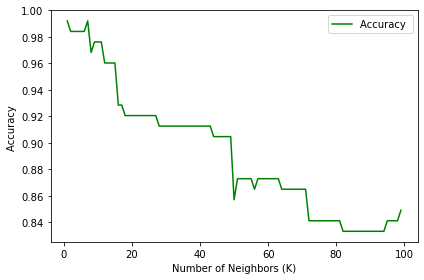

In [47]:
import matplotlib.pyplot as plt
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=6)

In [49]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([[0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0]], dtype=uint8)

In [52]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9682539682539683
Test set Accuracy:  0.9841269841269841
